# Dependencies

In [4]:
!pip install tensorflow  opencv-python matplotlib

In [8]:
import tensorflow as tf
import os

In [10]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [11]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
import cv2
import imghdr

In [16]:

data_dir = '/Users/prithivi/Projects/CNN/ImageClassification/data'

In [17]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


In [20]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('/Users/prithivi/Projects/CNN/ImageClassification/data')


Found 305 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

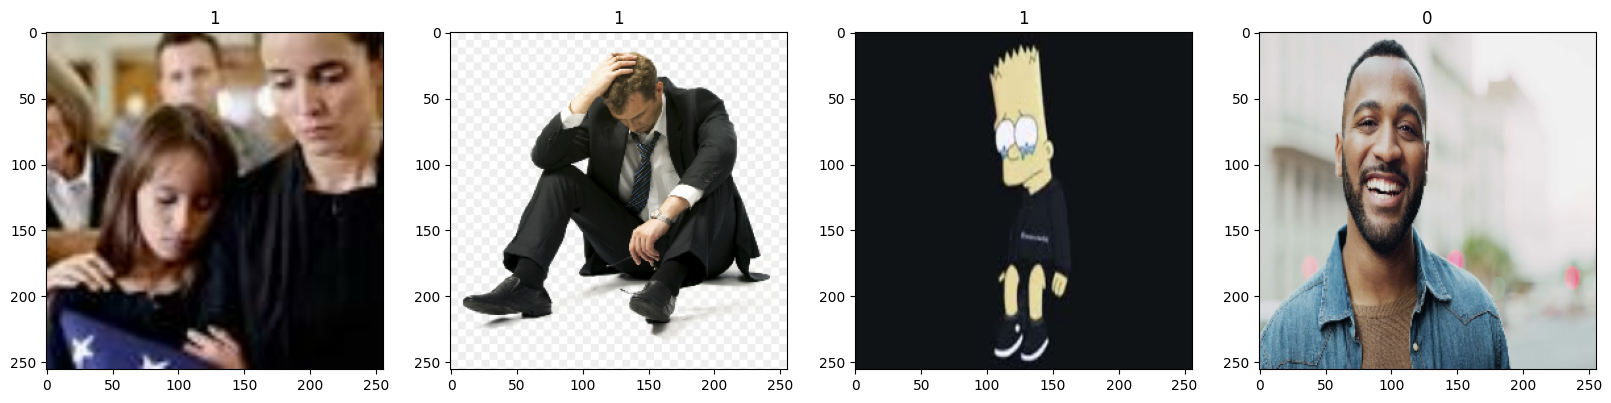

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[9.8370099e-01, 3.3725059e-01, 3.6747208e-01],
          [9.5272124e-01, 4.9464732e-01, 4.1177884e-01],
          [6.1387986e-01, 5.4334885e-01, 3.6003345e-01],
          ...,
          [2.9105559e-01, 3.2785860e-01, 1.3799785e-01],
          [2.7998620e-01, 3.1217065e-01, 1.4287923e-01],
          [2.6265869e-01, 2.8879777e-01, 1.3170621e-01]],
 
         [[9.8482448e-01, 3.1873947e-01, 3.8170430e-01],
          [9.7224718e-01, 4.5739123e-01, 4.0089661e-01],
          [6.4752626e-01, 5.3008240e-01, 3.5414463e-01],
          ...,
          [2.9585800e-01, 3.2797348e-01, 1.4365977e-01],
          [2.7952665e-01, 3.1482077e-01, 1.4202665e-01],
          [2.6324177e-01, 2.9337469e-01, 1.3247429e-01]],
 
         [[9.9022382e-01, 3.2925713e-01, 3.7742800e-01],
          [9.8230362e-01, 4.3007812e-01, 4.0179729e-01],
          [6.6383344e-01, 5.3108221e-01, 3.5899994e-01],
          ...,
          [2.8794497e-01, 3.2143077e-01, 1.3980690e-01],
          [2.7825519e-01, 3.0986854e-

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [26]:
train_size

7

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [32]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 15s 911ms/step - loss: 0.9219 - accuracy: 0.4777 - val_loss: 0.6957 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 6s 587ms/step - loss: 0.6767 - accuracy: 0.5848 - val_loss: 0.6238 - val_accuracy: 0.6719
Epoch 3/20
7/7 [==============================] - 8s 804ms/step - loss: 0.6151 - accuracy: 0.6518 - val_loss: 0.6108 - val_accuracy: 0.6094
Epoch 4/20
7/7 [==============================] - 6s 566ms/step - loss: 0.5580 - accuracy: 0.7366 - val_loss: 0.4745 - val_accuracy: 0.8125
Epoch 5/20
7/7 [==============================] - 7s 779ms/step - loss: 0.4133 - accuracy: 0.8482 - val_loss: 0.4366 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 6s 578ms/step - loss: 0.3530 - accuracy: 0.8616 - val_loss: 0.2906 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 8s 782ms/step - loss: 0.2473 - accuracy: 0.9375 - val_loss: 0.2024 - val_accuracy: 0.9219
Epoch 8/20
7/7 [===

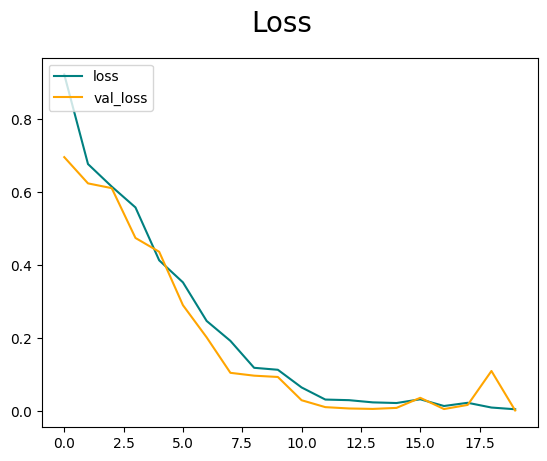

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

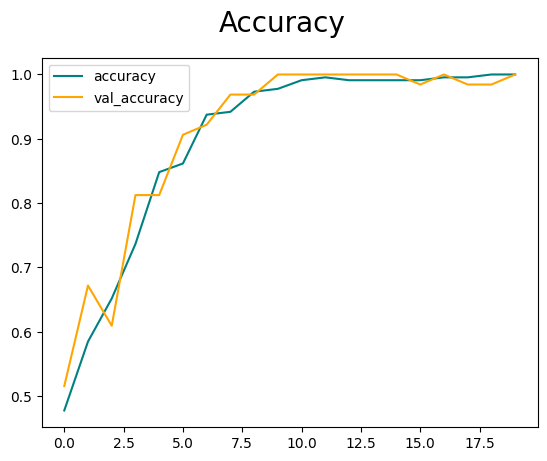

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 483ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


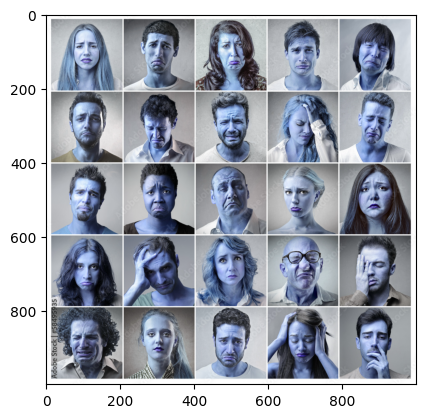

In [41]:
img = cv2.imread('/Users/prithivi/Projects/CNN/ImageClassification/data/sad/1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg')
plt.imshow(img)
plt.show()

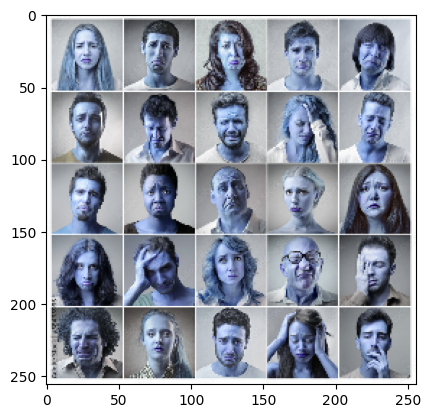

In [42]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 270ms/step


In [44]:
yhat

array([[0.99976796]], dtype=float32)

In [45]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [48]:
from tensorflow.keras.models import load_model
model.save('/Users/prithivi/Projects/CNN/ImageClassification/data/happysadclassifier.h5')
